# Imports

In [1]:
from pathlib import Path
import typing as t

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.dataset import TuneDataset

# Read Files

In [2]:
# Data folders
__name__ = 'mel_spectrograms.ipynb'
from src.objects import Tune


raw_data_filepath = Path(__name__).resolve().parents[1] / 'data' / 'raw'
assert raw_data_filepath.exists()
wav_files_folder = raw_data_filepath / 'wav'
assert wav_files_folder.exists()

dataset = TuneDataset().load_tunes(wav_files_folder)
print(dataset)

# It is then necessary to extract the tune contents
dataset.extract_tune(verbose=False)

50 files loaded from /home/mateus/Música/autoencoder-chiptune/data/raw/wav.


In [3]:
metadata = pd.read_csv(
    str(raw_data_filepath.parent / 'metadata.csv')
)
assert len(metadata['sound-type'].unique()) == 2 # soundscape and soundeffect

soundscapes_tunes_names = metadata[metadata['sound-type'] == 'soundscape'].title.to_list()

for soundscape_name in soundscapes_tunes_names:
    assert (wav_files_folder/soundscape_name).exists() # all files names are valid

# Plot Function

In [4]:
def plot_soundscapes(dataset: TuneDataset) -> t.Tuple[float,float,float]:
    """Plot audios sorted by duration.

    Parameters
    ----------
    dataset : TuneDataset
        Audios dataset.

    Returns
    -------
    median_duration
    q_25_duration
    q_75_duration
    """
    # Soundscapes files
    soundscapes_files = {tune.file_path.name: tune.time_length for tune in dataset.tunes if tune.file_path.name in soundscapes_tunes_names}


    # Plot the duration of each file ordered by duration
    sorted_files = sorted(soundscapes_files.items(), key=lambda x: x[1])
    file_names_sorted = [file[0] for file in sorted_files]
    durations_sorted = [file[1] for file in sorted_files]

    plt.bar(file_names_sorted, durations_sorted, color='red', alpha=0.7)

    # Calculate median, 25%, and 75% quartiles
    median_duration = np.median(durations_sorted)
    q25 = np.percentile(durations_sorted, 0.25)
    q75 = np.percentile(durations_sorted, 0.75)

    # Draw a vertical line at the median duration
    median_duration = durations_sorted[len(durations_sorted) // 2]
    q_25_duration = durations_sorted[len(durations_sorted) // 4]
    q_75_duration = durations_sorted[3*len(durations_sorted) // 4]
    plt.axvline(x=file_names_sorted[len(durations_sorted) // 2], color='black', linestyle='--', label=f'Median ({median_duration:.2f} sec)')
    plt.axvline(x=file_names_sorted[len(durations_sorted) // 4], color='black', linestyle='--', label=f'Q25 ({q_25_duration:.2f} sec)')
    plt.axvline(x=file_names_sorted[3*len(durations_sorted) // 4], color='black', linestyle='--', label=f'Q75 ({q_75_duration:.2f} sec)')


    plt.xlabel('Audio File Names')
    plt.ylabel('Duration (seconds)')
    plt.title('Duration of Soundscapes (Ordered by Duration)')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.legend()
    plt.grid(True)
    plt.show()
    return median_duration, q_25_duration, q_75_duration


## Plot Original

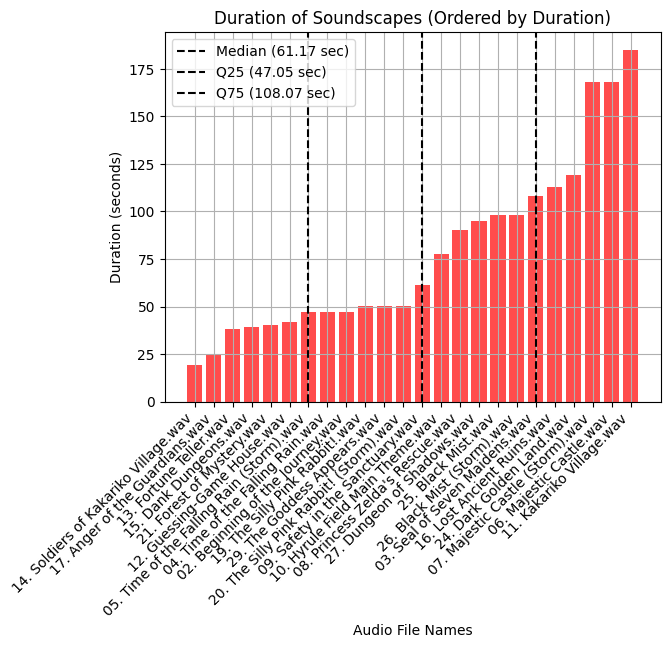

In [5]:
median_duration, q_25_duration, q_75_duration = plot_soundscapes(dataset)

_Let's make all files to have the same length. It will equal the 75% quartile._

# Padding & Cropping

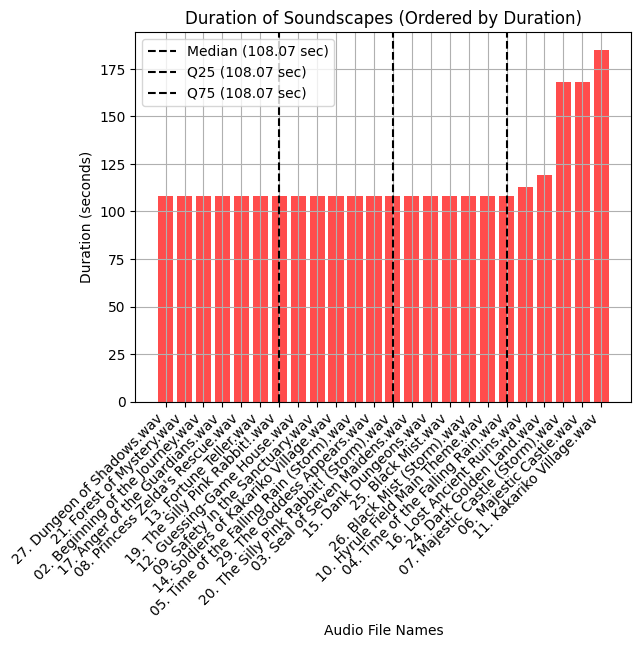

In [6]:
# PADDING
dataset.pad_tunes(q_75_duration)
_ = plot_soundscapes(dataset)

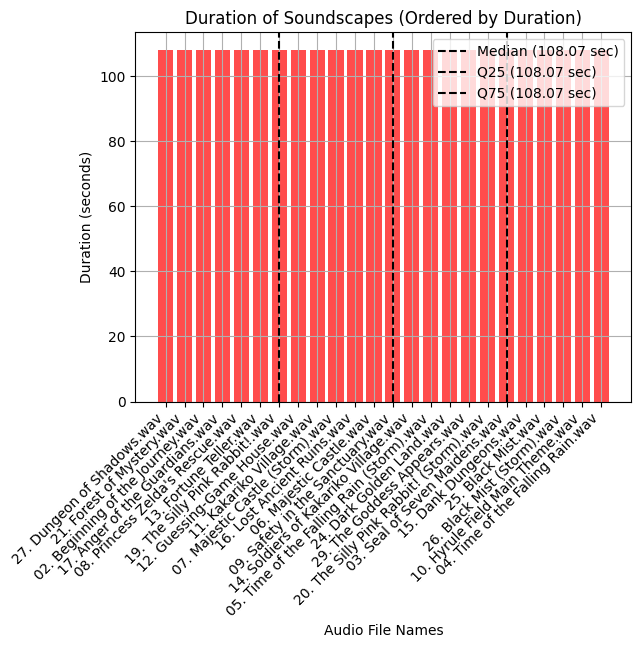

In [7]:
# CROPPING
dataset.crop_tunes(q_75_duration)
_ = plot_soundscapes(dataset)

In [8]:
# # FOR TESTING PURPOSES
# shortest_ = '14. Soldiers of Kakariko Village.wav'
# for tune in dataset.tunes:
#     if tune.file_path.name == shortest_:
#         print('found')
#         sample = tune
# sample.dump(raw_data_filepath.parent,
#                       'wav')